In [1]:
%matplotlib notebook
import pickle
import orbipy as op
from orbipy import mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from scipy.interpolate import CubicSpline

In [2]:
model = op.crtbp3_model()
stmmodel = op.crtbp3_model(stm=True)
point = model.L1
plotter = op.plotter.from_model(model, length_units='Gm', velocity_units='km/s')
scale = plotter.scaler
pmodel = op.crtbp3_model()
pmodel.integrator.set_params(max_step=scale(1, 'd-nd'))

In [4]:
el1_dist = (1.-model.mu) - model.L1

In [ ]:
# fnames = glob.glob('MapT60pi/*.bin')
# min_max_60 = pd.concat([pickle.load(open(fname,'rb')) for fname in fnames])
# pickle.dump(min_max_60, open('min_max_60.bin','wb'))

In [3]:
min_max_60 = pickle.load(open('min_max_60.bin','rb'))
min_max_70 = pickle.load(open('min_max_70.bin','rb'))
min_max_80 = pickle.load(open('min_max_80.bin','rb'))
min_max_05pi = pickle.load(open('min_max_05pi.bin','rb'))
min_max_100 = pickle.load(open('min_max_100.bin','rb'))
min_max_110 = pickle.load(open('min_max_110.bin','rb'))
min_max_120 = pickle.load(open('min_max_120.bin','rb'))

In [10]:
mm = [min_max_70, min_max_80, min_max_05pi, min_max_100, min_max_110, min_max_120]

In [7]:
from copy import copy

In [60]:
min_mix = []
for index, elem in min_max_60.iterrows():
#     print(elem)
    min_dist = copy(elem['min_dist'])
    ind = 0
    for i, df in enumerate(mm,1):
        temp = copy(df[(df['x0']==elem['x0']) & (df['z0']==elem['z0'])]['min_dist'].to_numpy()[0])
        if temp > min_dist:
            min_dist = temp
            ind = i
    min_mix.append({'x0':elem['x0'],'z0':elem['z0'],'min_dist':min_dist,'ind':ind})

In [61]:
min_mix = pd.DataFrame(min_mix)

In [62]:
min_mix.head()

,ind,min_dist,x0,z0
0,3,0.007908,0.996505,0.001939
1,0,0.002154,0.996171,0.014104
2,3,0.011203,0.998042,0.007353
3,3,0.013263,0.995435,0.005348
4,3,0.012898,0.995903,0.003944


In [63]:
#pickle.dump(min_mix, open('min_mix.bin','wb'))

In [8]:
def draw_dist_map(df, save=False, T=None):
    fig, ax = plt.subplots()
    sc = plt.scatter(scale(df['x0'],'nd-Gm'), scale(df['z0'],'nd-Gm'), c=scale(df['min_dist'],'nd-Gm'), cmap='jet', s=1.5)
    plt.colorbar(sc)
#     ax.plot(scale(model.L1,'nd-Gm'), 0., 'x')
#     ax.plot(scale(1.-model.mu,'nd-Gm'), 0., '+')
    ax.set_xlabel('x, $\dot{}10^6$ км')
    ax.set_ylabel('y, $\dot{}10^6$ км')
    ax.axis('equal')
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(147.4,2.2,"T={} суток".format(T), bbox=props)
#     ax.text(147.4,2.2,"$60\leqslant T \leqslant 120$".format(T), bbox=props)
    if save:
        plt.savefig(save)
    return fig

<IPython.core.display.Javascript object>


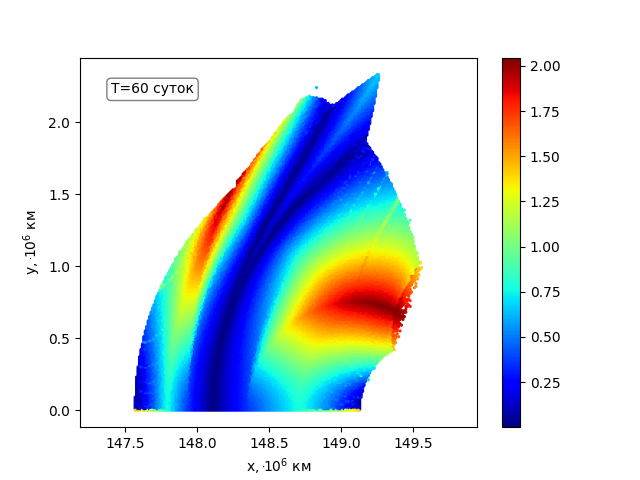

In [9]:
fig = draw_dist_map(min_max_60, T=60)